In [2]:
import math, random, os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf

2025-05-05 20:23:04.493911: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 20:23:04.494169: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 20:23:04.496680: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 20:23:04.526663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-05 20:23:05.233723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [80]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
data_x = dataset.data
data_y = dataset.target.reshape(-1, 1)

#data_x = np.c_[np.ones((data_x.shape[0], 1)), data_x]

X = tf.constant(data_x, dtype=tf.float32)
y = tf.constant(data_y, dtype=tf.float32)

XT = tf.transpose(X)
theta = tf.linalg.inv(XT @ X) @ XT @ y

y_pred = X @ theta

y_pred


<tf.Tensor: shape=(20640, 1), dtype=float32, numpy=
array([[4.098555  ],
       [3.8839264 ],
       [3.5296652 ],
       ...,
       [0.61935395],
       [0.743578  ],
       [0.9905619 ]], dtype=float32)>

Epoch 1/10


/home/eugen/PhpstormProjects/ai_learn/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9182 - val_loss: 1.5398
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2632 - val_loss: 0.8104
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7473 - val_loss: 0.6610
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6372 - val_loss: 0.6234
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6064 - val_loss: 0.6085
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5922 - val_loss: 0.5991
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5823 - val_loss: 0.5917
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5741 - val_loss: 0.5854
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5669 - val_loss: 0.5799
Epoch 10/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5607 - val_loss: 0.5752
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5761  
[array([[ 0.82893115],
       [ 0.18612683],
       [-0.11985468],
       [ 0.13750163],
   

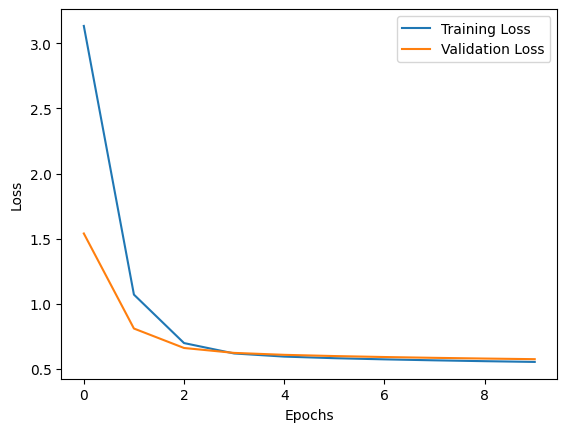

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))
])

# Compile the model with SGD optimizer and a smaller learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print(model.get_weights())
print(f'Test Loss: {test_loss}')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()